# Exercício Aula 6


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans,DBSCAN

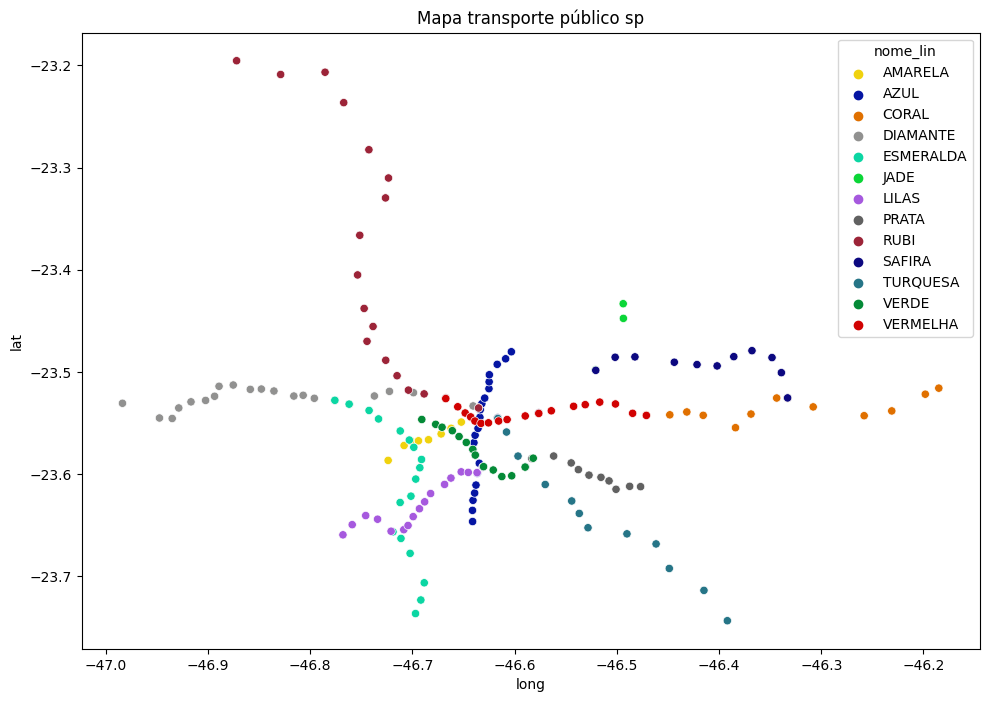

In [2]:
#Carregar DATASET
df = pd.read_csv("metroetrem_sp_comlinks.csv").reset_index(drop=True)

#AJUSTAR LAT/LONG
df['long']= df['long']/1e6
df['lat'] = df['lat']/1e6

#ATRIBUIR CORES AS LINHAS
colors = {'AMARELA': '#f0d20e',
          'AZUL': '#0515a3',
          'CORAL': '#e07000',
          'DIAMANTE': '#919190',
          'ESMERALDA': '#0bd6a3',
          'JADE': '#0bd637',
          'LILAS': '#a659de',
          'PRATA': '#616161',
          'RUBI': '#9c2438',
          'SAFIRA': '#0c0880',
          'TURQUESA': '#267587',
          'VERDE': '#048a37',
          'VERMELHA': '#d10202'
          }

plt.figure(figsize=(16,8))

plt.title("Mapa transporte público sp")
sns.scatterplot(data=df, x="long", y="lat", hue="nome_lin", palette=colors)

plt.gca().set_aspect("equal", adjustable="box")
plt.show()


In [3]:
X_sp = df[["lat", "long"]].copy()
X_sp = np.radians(X_sp)

In [4]:
def clusterizacao(X, eps_km, min_samples):

    X=X.copy()
    RT = 6371.0088
    eps_angular = eps_km/RT

    dbscan= DBSCAN(eps= eps_angular, min_samples=min_samples, metric="haversine").fit(X)

    X["cluster"] = dbscan.labels_

    plt.figure(figsize=(16,8))

    plt.title("Mapa Transporte SP")

    sns.scatterplot(data=X, x= "long", y="lat", hue="cluster", palette='viridis')

    plt.gca().set_aspect("equal", adjustable="box")
    plt.show()
    return X

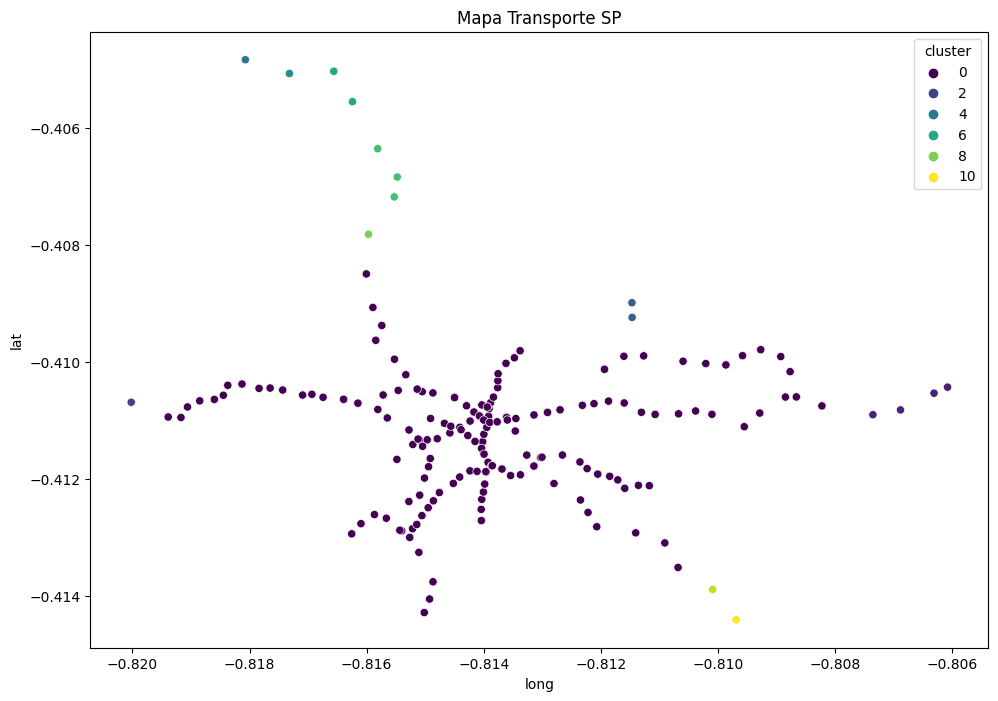

In [5]:
df_resposta = clusterizacao(X_sp, eps_km=4, min_samples=1)

In [6]:

def clusterizacao_kmeans(X, n_clusters):
    X = X.copy()

    # Ajustando o modelo KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    # Fitting with inputs
    kmeans= kmeans.fit(X)
    # Predicting the clusters
    labels = kmeans.predict(X)

    X['cluster'] = labels

    # Plotando o mapa
    plt.figure(figsize=(16, 8))
    plt.title('Mapa Transporte SP - KMeans')
    sns.scatterplot(data=X, x='long', y='lat', hue='cluster', palette='viridis', legend='full')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

    return X

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


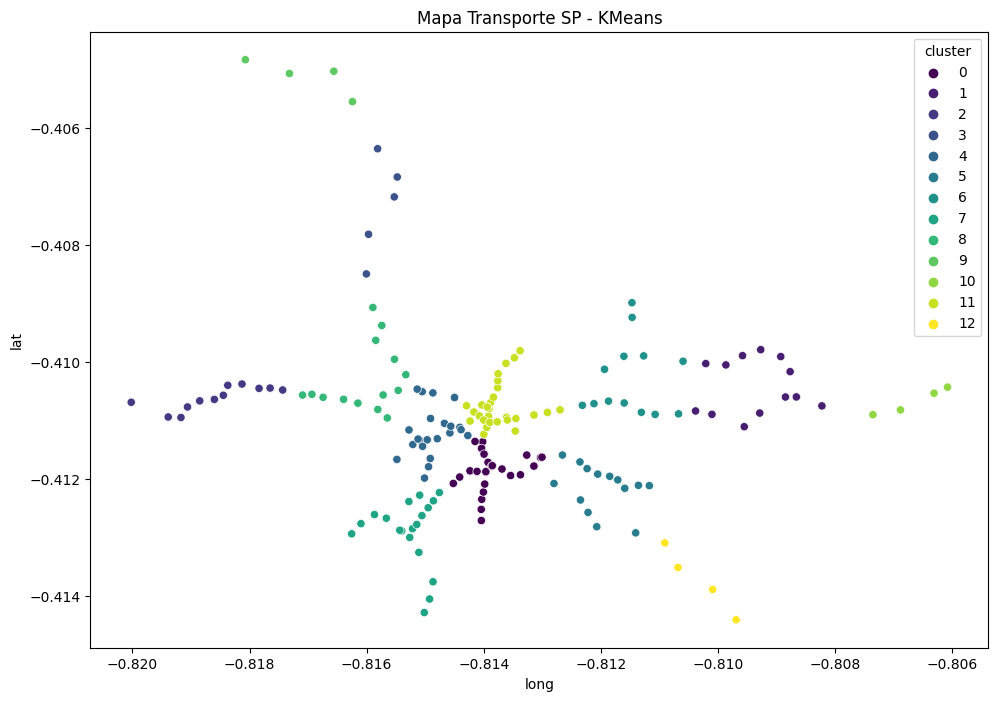

In [7]:
df_resposta = clusterizacao_kmeans(X_sp, len(colors))